## 라이브러리 불러오기

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString, shape
from shapely.geometry.polygon import Polygon
import requests
import pprint
import json
import numpy as np
import pyproj
import os
import folium
import time 
import math
import warnings
warnings.filterwarnings('ignore')

## 광진구 지번 및 지번코드

In [2]:
map_GJ= gpd.GeoDataFrame.from_file('./LSMD_CONT_LDREG_서울_광진구/LSMD_CONT_LDREG_11215.shp', encoding='cp949')
map_GJ.head()

DriverError: ./LSMD_CONT_LDREG_서울_광진구/LSMD_CONT_LDREG_11215.shp: No such file or directory

In [ ]:
print(map_GJ.crs)

None


In [ ]:
#좌표계 변환 (GRS80 중부원점에서 위도 경도 좌표계로)
map_GJ.set_crs(epsg=5186, inplace=True)
map_GJ = map_GJ.to_crs(epsg=4326)
map_GJ = map_GJ.to_crs({'init':'epsg:4326'})

In [ ]:
map_GJ

,sgg_oid,jibun,bchk,pnu,col_adm_se,geometry
0,201793,18-54 공,1,1121510200100180054,11215,"POLYGON ((127.07986 37.55223, 127.07985 37.552..."
1,83707,135-19도,1,1121510200101350019,11215,"POLYGON ((127.08205 37.55249, 127.08211 37.552..."
2,83772,135-35대,1,1121510200101350035,11215,"POLYGON ((127.08224 37.55230, 127.08230 37.552..."
3,83473,143대,1,1121510200101430000,11215,"POLYGON ((127.08061 37.55301, 127.08072 37.552..."
4,92539,553-59도,1,1121510500105530059,11215,"POLYGON ((127.06529 37.53675, 127.06531 37.536..."
...,...,...,...,...,...,...
32682,99225,57-96도,1,1121510500100570096,11215,"POLYGON ((127.06461 37.53449, 127.06473 37.534..."
32683,94139,720도,1,1121510500107200000,11215,"POLYGON ((127.08028 37.53377, 127.08049 37.533..."
32684,94140,721-1도,1,1121510500107210001,11215,"POLYGON ((127.08228 37.53377, 127.08225 37.533..."
32685,94141,721도,1,1121510500107210000,11215,"POLYGON ((127.08257 37.53377, 127.08260 37.533..."


## 광진구 행정동 영역 데이터

In [ ]:
map_hjd= gpd.GeoDataFrame.from_file('./Z_SOP_BND_ADM_DONG_PG\Z_SOP_BND_ADM_DONG_PG.shp', encoding='cp949')
map_hjd.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20210630,1101053,사직동,1,"POLYGON ((197702.069 453187.311, 197703.481 45..."
1,20210630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20210630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20210630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20210630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.618 45..."


In [ ]:
print(map_hjd.crs)

PROJCS["ITRF_2000_TM_Korea_Central_Belt",GEOGCS["ITRF2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",500000],UNIT["m",1],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","5181"]]


In [ ]:
# 좌표계 변환 (과거 GRS80 중부원점에서 위도 경도 좌표계로)
map_hjd = map_hjd.to_crs({'init':'epsg:4326'})

In [ ]:
map_hjd

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20210630,1101053,사직동,1,"POLYGON ((126.97399 37.57823, 126.97400 37.578..."
1,20210630,1101054,삼청동,2,"POLYGON ((126.97714 37.59768, 126.97730 37.597..."
2,20210630,1101055,부암동,3,"POLYGON ((126.96173 37.60714, 126.96182 37.607..."
3,20210630,1101056,평창동,4,"POLYGON ((126.97509 37.63118, 126.97488 37.630..."
4,20210630,1101057,무악동,5,"POLYGON ((126.95975 37.58001, 126.96006 37.579..."
...,...,...,...,...,...
3496,20210630,3902058,서홍동,3497,"POLYGON ((126.53017 33.31800, 126.53041 33.317..."
3497,20210630,3902059,대륜동,3498,"MULTIPOLYGON (((126.51498 33.21638, 126.51497 ..."
3498,20210630,3902060,대천동,3499,"MULTIPOLYGON (((126.50292 33.22523, 126.50290 ..."
3499,20210630,3902061,중문동,3500,"POLYGON ((126.46566 33.36000, 126.46684 33.359..."


In [ ]:
# 광진구 행정동만 선택해서 추출
map_hjd_GJ = map_hjd[map_hjd['ADM_DR_CD'].str[0:5] == '11050']

In [ ]:
map_hjd_GJ

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
65,20210630,1105053,화양동,66,"POLYGON ((127.07047 37.54799, 127.07057 37.547..."
66,20210630,1105054,군자동,67,"POLYGON ((127.07924 37.55673, 127.07911 37.556..."
67,20210630,1105055,중곡1동,68,"POLYGON ((127.07950 37.55717, 127.07950 37.557..."
68,20210630,1105056,중곡2동,69,"POLYGON ((127.08574 37.56338, 127.08574 37.563..."
69,20210630,1105057,중곡3동,70,"POLYGON ((127.08062 37.57164, 127.08065 37.571..."
70,20210630,1105058,중곡4동,71,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
71,20210630,1105059,능동,72,"POLYGON ((127.08274 37.55590, 127.08284 37.555..."
72,20210630,1105060,구의1동,73,"POLYGON ((127.09021 37.54283, 127.09014 37.542..."
73,20210630,1105061,구의2동,74,"POLYGON ((127.10492 37.55638, 127.10491 37.556..."
74,20210630,1105062,구의3동,75,"POLYGON ((127.09248 37.54412, 127.09266 37.544..."


In [ ]:
using_columns = ['ADM_DR_CD', 'ADM_DR_NM', 'geometry']

In [ ]:
# 필요한 열만 선택
map_hjd_GJ = map_hjd_GJ[using_columns]
map_hjd_GJ

,ADM_DR_CD,ADM_DR_NM,geometry
65,1105053,화양동,"POLYGON ((127.07047 37.54799, 127.07057 37.547..."
66,1105054,군자동,"POLYGON ((127.07924 37.55673, 127.07911 37.556..."
67,1105055,중곡1동,"POLYGON ((127.07950 37.55717, 127.07950 37.557..."
68,1105056,중곡2동,"POLYGON ((127.08574 37.56338, 127.08574 37.563..."
69,1105057,중곡3동,"POLYGON ((127.08062 37.57164, 127.08065 37.571..."
70,1105058,중곡4동,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
71,1105059,능동,"POLYGON ((127.08274 37.55590, 127.08284 37.555..."
72,1105060,구의1동,"POLYGON ((127.09021 37.54283, 127.09014 37.542..."
73,1105061,구의2동,"POLYGON ((127.10492 37.55638, 127.10491 37.556..."
74,1105062,구의3동,"POLYGON ((127.09248 37.54412, 127.09266 37.544..."


In [ ]:
map_GJ2 = map_GJ.to_crs(epsg=5179)
map_GJ2 = map_GJ.to_crs({'init':'epsg:5179'})
map_GJ2

,sgg_oid,jibun,bchk,pnu,col_adm_se,geometry
0,201793,18-54 공,1,1121510200100180054,11215,"POLYGON ((962889.755 1950403.944, 962889.013 1..."
1,83707,135-19도,1,1121510200101350019,11215,"POLYGON ((963083.023 1950431.566, 963088.520 1..."
2,83772,135-35대,1,1121510200101350035,11215,"POLYGON ((963099.867 1950410.935, 963105.167 1..."
3,83473,143대,1,1121510200101430000,11215,"POLYGON ((962955.864 1950489.875, 962965.690 1..."
4,92539,553-59도,1,1121510500105530059,11215,"POLYGON ((961594.554 1948692.660, 961596.444 1..."
...,...,...,...,...,...,...
32682,99225,57-96도,1,1121510500100570096,11215,"POLYGON ((961533.123 1948442.016, 961543.597 1..."
32683,94139,720도,1,1121510500107200000,11215,"POLYGON ((962917.450 1948355.728, 962935.977 1..."
32684,94140,721-1도,1,1121510500107210001,11215,"POLYGON ((963094.381 1948354.790, 963091.466 1..."
32685,94141,721도,1,1121510500107210000,11215,"POLYGON ((963119.754 1948354.655, 963122.139 1..."


In [ ]:
from shapely.geometry import Polygon
xmin,ymin,xmax,ymax = map_GJ2.total_bounds
length = 200 #세로 길이
wide = 200 #가로 길이
cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax)), wide))
rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax)), length))
rows.reverse()
polygons = []
x_index = []
y_index = []
x_tmp = 0
for x in cols:
    y_tmp = 0
    for y in rows:
        x_index.append(x_tmp)
        y_index.append(y_tmp)
        y_tmp += 1
        polygons.append( Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]) )
    x_tmp += 1
grid200 = gpd.GeoDataFrame({'geometry':polygons})
grid200.crs = "epsg:5179"
grid200['index'] = grid200.index  #폴리곤별 인덱스를 컬럼으로 생성 - 나중에 속성조인을 위해

In [ ]:
grid200['x_index'] = x_index
grid200['y_index'] = y_index

In [ ]:
grid200

,geometry,index,x_index,y_index
0,"POLYGON ((960788.000 1952708.000, 960988.000 1...",0,0,0
1,"POLYGON ((960788.000 1952508.000, 960988.000 1...",1,0,1
2,"POLYGON ((960788.000 1952308.000, 960988.000 1...",2,0,2
3,"POLYGON ((960788.000 1952108.000, 960988.000 1...",3,0,3
4,"POLYGON ((960788.000 1951908.000, 960988.000 1...",4,0,4
...,...,...,...,...
778,"POLYGON ((965988.000 1947908.000, 966188.000 1...",778,26,24
779,"POLYGON ((965988.000 1947708.000, 966188.000 1...",779,26,25
780,"POLYGON ((965988.000 1947508.000, 966188.000 1...",780,26,26
781,"POLYGON ((965988.000 1947308.000, 966188.000 1...",781,26,27


In [ ]:
grid_cnt = gpd.sjoin(grid200, map_GJ2)

In [ ]:
grid_cnt_4326 = grid_cnt.to_crs(epsg=4326) 
grid_cnt_4326

,geometry,index,x_index,y_index,index_right,sgg_oid,jibun,bchk,pnu,col_adm_se
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",22,0,22,638,99584,145-4천,1,1121510500101450004,11215
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",23,0,23,638,99584,145-4천,1,1121510500101450004,11215
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",51,1,22,638,99584,145-4천,1,1121510500101450004,11215
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",52,1,23,638,99584,145-4천,1,1121510500101450004,11215
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",80,2,22,638,99584,145-4천,1,1121510500101450004,11215
...,...,...,...,...,...,...,...,...,...,...
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",734,25,9,19765,90023,559천,1,1121510400105590000,11215
763,"POLYGON ((127.11491 37.55689, 127.11718 37.556...",763,26,9,19765,90023,559천,1,1121510400105590000,11215
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",734,25,9,19763,90021,564천,1,1121510400105640000,11215
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",734,25,9,19772,90030,15수,1,1121510400100150000,11215


In [ ]:
grid_cnt_4326.drop_duplicates(subset='geometry',inplace = True)

In [ ]:
grid_cnt_4326

,geometry,index,x_index,y_index,index_right,sgg_oid,jibun,bchk,pnu,col_adm_se
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",22,0,22,638,99584,145-4천,1,1121510500101450004,11215
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",23,0,23,638,99584,145-4천,1,1121510500101450004,11215
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",51,1,22,638,99584,145-4천,1,1121510500101450004,11215
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",52,1,23,638,99584,145-4천,1,1121510500101450004,11215
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",80,2,22,638,99584,145-4천,1,1121510500101450004,11215
...,...,...,...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",732,25,7,19175,89972,5-2대,1,1121510400100050002,11215
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",733,25,8,19175,89972,5-2대,1,1121510400100050002,11215
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",734,25,9,8964,106075,1 수,1,1121510400100010000,11215
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",735,25,10,5622,90063,17수,1,1121510400100170000,11215


## 광진구 버스정류장 데이터

In [ ]:
busS_SEOUL= pd.read_csv("./서울시 정류장마스터 정보.csv" ,encoding='cp949', dtype=str)
busS_SEOUL.head()

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부
0,717104358,계수사거리(경유),가상정류장,0,126.8174730000,37.4524730000,미설치
1,500000288,행사장입구,마을버스,25965,126.6915560000,37.3217420000,미설치
2,500000287,행사장입구,마을버스,25095,126.6917280000,37.3219420000,미설치
3,500000286,아남중전기,일반차로,25963,126.7104850000,37.3199340000,미설치
4,500000285,3Z,일반차로,25964,126.7071300000,37.3205660000,미설치


In [ ]:
# 데이터를 맵핑하기 위하여 GeoDataFrame 형식으로 변환
busS_SEOUL['경도'] =busS_SEOUL['경도'].astype(float)
busS_SEOUL['위도'] = busS_SEOUL['위도'].astype(float)
busS_SEOUL['geometry'] = busS_SEOUL.apply(lambda row : Point([row['위도'], row['경도']]), axis=1)
busS_SEOUL = gpd.GeoDataFrame(busS_SEOUL, geometry='geometry')

busS_SEOUL.head()

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부,geometry
0,717104358,계수사거리(경유),가상정류장,0,126.817473,37.452473,미설치,POINT (126.81747 37.45247)
1,500000288,행사장입구,마을버스,25965,126.691556,37.321742,미설치,POINT (126.69156 37.32174)
2,500000287,행사장입구,마을버스,25095,126.691728,37.321942,미설치,POINT (126.69173 37.32194)
3,500000286,아남중전기,일반차로,25963,126.710485,37.319934,미설치,POINT (126.71049 37.31993)
4,500000285,3Z,일반차로,25964,126.707130,37.320566,미설치,POINT (126.70713 37.32057)


In [ ]:
print(busS_SEOUL.crs)

None


In [ ]:
# 좌표계 설정 및 광진구 버스 정류장만을 대상으로 하는 데이터 busS_GJ 생성
busS_SEOUL.crs = {'init':'epsg:4326'}
busS_SEOUL = busS_SEOUL.to_crs({'init':'epsg:4326'})
busS_GJ = gpd.sjoin(busS_SEOUL.to_crs(epsg=4326), map_GJ)
print(busS_GJ.crs)

EPSG:4326


In [ ]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부,geometry,index_right,sgg_oid,jibun,bchk,pnu,col_adm_se
1759,277103552,뚝섬(경유),가상정류장,0,127.067091,37.531727,미설치,POINT (127.06709 37.53173),683,99593,73-3제,1,1121510500100730003,11215
1760,277103551,뚝섬(경유),가상정류장,0,127.066757,37.531816,미설치,POINT (127.06676 37.53182),639,99586,71-2제,1,1121510500100710002,11215
1800,277103511,영동대교북단(경유),가상정류장,0,127.059683,37.533713,미설치,POINT (127.05968 37.53371),613,99422,159-65제,1,1121510500101590065,11215
1801,277103510,잠실대교북단(경유),가상정류장,0,127.088280,37.528064,미설치,POINT (127.08828 37.52806),15,97065,704-7제,1,1121510500107040007,11215
1802,277103509,잠실대교북단(경유),가상정류장,0,127.088549,37.528812,미설치,POINT (127.08855 37.52881),6160,96951,753-3도,1,1121510500107530003,11215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69304,104000010,메리놀외방선교회,일반차로,05103,127.077541,37.559211,설치,POINT (127.07754 37.55921),4334,79283,669도,1,1121510100106690000,11215
69305,104000009,군자교,일반차로,05102,127.075229,37.562386,설치,POINT (127.07523 37.56239),25871,76788,610-3대,1,1121510100106100003,11215
69306,104000008,군자교,일반차로,05101,127.075203,37.561533,설치,POINT (127.07520 37.56153),25898,77282,614-1대,1,1121510100106140001,11215
69310,104000004,군자역.용마초등학교,중앙차로,05004,127.081566,37.556223,설치,POINT (127.08157 37.55622),28486,82493,265-10도,1,1121510200102650010,11215


In [ ]:
# 필요한 열만 선택
using_columns = ['정류장_ID', '정류장_명칭', '정류장_유형', '정류장_번호', '위도','경도','geometry','sgg_oid','jibun','pnu']
busS_GJ = busS_GJ[using_columns]

In [ ]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu
1759,277103552,뚝섬(경유),가상정류장,0,127.067091,37.531727,POINT (127.06709 37.53173),99593,73-3제,1121510500100730003
1760,277103551,뚝섬(경유),가상정류장,0,127.066757,37.531816,POINT (127.06676 37.53182),99586,71-2제,1121510500100710002
1800,277103511,영동대교북단(경유),가상정류장,0,127.059683,37.533713,POINT (127.05968 37.53371),99422,159-65제,1121510500101590065
1801,277103510,잠실대교북단(경유),가상정류장,0,127.088280,37.528064,POINT (127.08828 37.52806),97065,704-7제,1121510500107040007
1802,277103509,잠실대교북단(경유),가상정류장,0,127.088549,37.528812,POINT (127.08855 37.52881),96951,753-3도,1121510500107530003
...,...,...,...,...,...,...,...,...,...,...
69304,104000010,메리놀외방선교회,일반차로,05103,127.077541,37.559211,POINT (127.07754 37.55921),79283,669도,1121510100106690000
69305,104000009,군자교,일반차로,05102,127.075229,37.562386,POINT (127.07523 37.56239),76788,610-3대,1121510100106100003
69306,104000008,군자교,일반차로,05101,127.075203,37.561533,POINT (127.07520 37.56153),77282,614-1대,1121510100106140001
69310,104000004,군자역.용마초등학교,중앙차로,05004,127.081566,37.556223,POINT (127.08157 37.55622),82493,265-10도,1121510200102650010


In [ ]:
# 가상정류장 제거 및 자료형 변환
busS_GJ = busS_GJ[busS_GJ['정류장_번호'] != '0']
busS_GJ['정류장_ID']=busS_GJ['정류장_ID'].astype(int)
busS_GJ['정류장_번호']=busS_GJ['정류장_번호'].astype(int)
busS_GJ 

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu
5018,274000018,잠실대교북단(경유),일반차로,78449,127.088565,37.528817,POINT (127.08857 37.52882),96951,753-3도,1121510500107530003
4549,274116390,천호대교북단(경유),일반차로,78253,127.107950,37.544258,POINT (127.10795 37.54426),91230,555-4천,1121510400105550004
2940,277102303,광나루역(경유),일반차로,78355,127.104251,37.544694,POINT (127.10425 37.54469),91245,218-22대,1121510400102180022
2942,277102301,잠실대교북단(경유),일반차로,78353,127.090492,37.529313,POINT (127.09049 37.52931),96289,701제,1121510500107010000
5017,274000019,잠실대교북단(경유),일반차로,78450,127.090479,37.529354,POINT (127.09048 37.52935),96289,701제,1121510500107010000
...,...,...,...,...,...,...,...,...,...,...
69304,104000010,메리놀외방선교회,일반차로,5103,127.077541,37.559211,POINT (127.07754 37.55921),79283,669도,1121510100106690000
69305,104000009,군자교,일반차로,5102,127.075229,37.562386,POINT (127.07523 37.56239),76788,610-3대,1121510100106100003
69306,104000008,군자교,일반차로,5101,127.075203,37.561533,POINT (127.07520 37.56153),77282,614-1대,1121510100106140001
69310,104000004,군자역.용마초등학교,중앙차로,5004,127.081566,37.556223,POINT (127.08157 37.55622),82493,265-10도,1121510200102650010


In [ ]:
# 버스정류장이 속한 행정동 추가
busS_GJ = gpd.sjoin(busS_GJ.to_crs(epsg=4326), map_hjd_GJ)

In [ ]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu,index_right,ADM_DR_CD,ADM_DR_NM
5018,274000018,잠실대교북단(경유),일반차로,78449,127.088565,37.528817,POINT (127.08857 37.52882),96951,753-3도,1121510500107530003,77,1105065,자양2동
2942,277102301,잠실대교북단(경유),일반차로,78353,127.090492,37.529313,POINT (127.09049 37.52931),96289,701제,1121510500107010000,77,1105065,자양2동
5017,274000019,잠실대교북단(경유),일반차로,78450,127.090479,37.529354,POINT (127.09048 37.52935),96289,701제,1121510500107010000,77,1105065,자양2동
69003,104900116,행운슈퍼앞,마을버스,5572,127.087010,37.532950,POINT (127.08701 37.53295),94599,682-15대,1121510500106820015,77,1105065,자양2동
69005,104900114,성자초등학교앞,마을버스,5562,127.082256,37.531300,POINT (127.08226 37.53130),95777,652-31대,1121510500106520031,77,1105065,자양2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69205,104000127,영동대교북단,일반차로,5220,127.061162,37.536568,POINT (127.06116 37.53657),98481,235-3전,1121510500102350003,79,1105067,자양4동
69207,104000125,건대로데오거리입구,일반차로,5218,127.069926,37.538919,POINT (127.06993 37.53892),247655,2-65 도,1121510500100020065,79,1105067,자양4동
69208,104000124,건대입구역6번출구,일반차로,5217,127.067279,37.540827,POINT (127.06728 37.54083),97155,8-24대,1121510500100080024,79,1105067,자양4동
69209,104000123,노룬산시장,일반차로,5216,127.062691,37.539503,POINT (127.06269 37.53950),97503,250-10대,1121510500102500010,79,1105067,자양4동


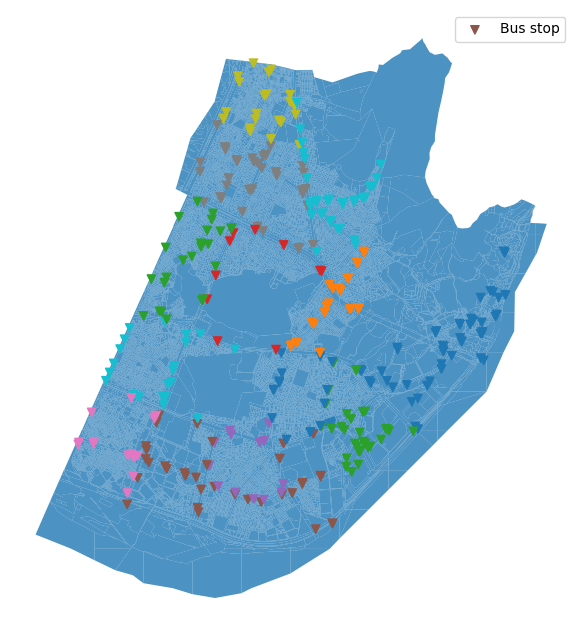

In [ ]:
# 버스정류장 행정동 별로 시각화
ax = map_GJ.plot(figsize=(8,8), alpha=0.8)
busS_GJ.plot(ax=ax, column = 'ADM_DR_NM',marker='v', label='Bus stop')
ax.set_axis_off()
plt.legend()
plt.show()

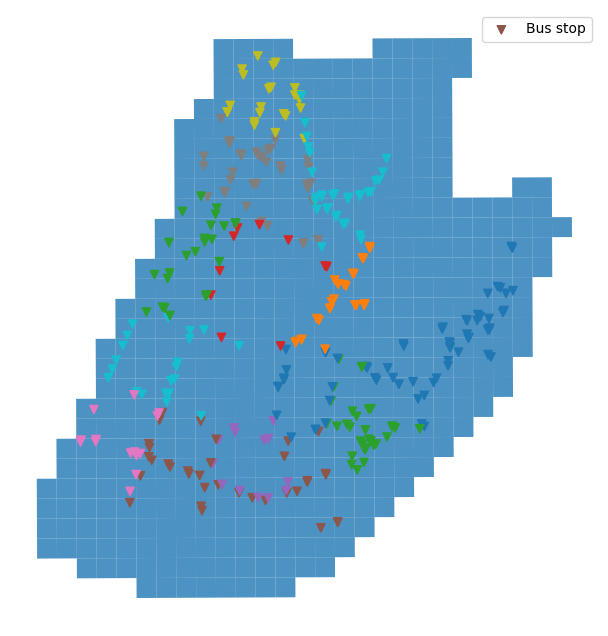

In [ ]:
ax = grid_cnt_4326.plot(figsize=(8,8), alpha=0.8)
busS_GJ.plot(ax=ax, column = 'ADM_DR_NM',marker='v', label='Bus stop')
ax.set_axis_off()
plt.legend()
plt.show()

In [ ]:
grid_cnt_4326.drop(['index_right','index'], axis=1,inplace=True)

In [ ]:
grid_cnt_4326

,geometry,x_index,y_index,sgg_oid,jibun,bchk,pnu,col_adm_se
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,145-4천,1,1121510500101450004,11215
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,145-4천,1,1121510500101450004,11215
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,145-4천,1,1121510500101450004,11215
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,145-4천,1,1121510500101450004,11215
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,145-4천,1,1121510500101450004,11215
...,...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,5-2대,1,1121510400100050002,11215
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,5-2대,1,1121510400100050002,11215
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,1 수,1,1121510400100010000,11215
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,17수,1,1121510400100170000,11215


In [ ]:
busS_GJ.drop(['index_right'], axis=1,inplace=True)
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu,ADM_DR_CD,ADM_DR_NM
5018,274000018,잠실대교북단(경유),일반차로,78449,127.088565,37.528817,POINT (127.08857 37.52882),96951,753-3도,1121510500107530003,1105065,자양2동
2942,277102301,잠실대교북단(경유),일반차로,78353,127.090492,37.529313,POINT (127.09049 37.52931),96289,701제,1121510500107010000,1105065,자양2동
5017,274000019,잠실대교북단(경유),일반차로,78450,127.090479,37.529354,POINT (127.09048 37.52935),96289,701제,1121510500107010000,1105065,자양2동
69003,104900116,행운슈퍼앞,마을버스,5572,127.087010,37.532950,POINT (127.08701 37.53295),94599,682-15대,1121510500106820015,1105065,자양2동
69005,104900114,성자초등학교앞,마을버스,5562,127.082256,37.531300,POINT (127.08226 37.53130),95777,652-31대,1121510500106520031,1105065,자양2동
...,...,...,...,...,...,...,...,...,...,...,...,...
69205,104000127,영동대교북단,일반차로,5220,127.061162,37.536568,POINT (127.06116 37.53657),98481,235-3전,1121510500102350003,1105067,자양4동
69207,104000125,건대로데오거리입구,일반차로,5218,127.069926,37.538919,POINT (127.06993 37.53892),247655,2-65 도,1121510500100020065,1105067,자양4동
69208,104000124,건대입구역6번출구,일반차로,5217,127.067279,37.540827,POINT (127.06728 37.54083),97155,8-24대,1121510500100080024,1105067,자양4동
69209,104000123,노룬산시장,일반차로,5216,127.062691,37.539503,POINT (127.06269 37.53950),97503,250-10대,1121510500102500010,1105067,자양4동


In [ ]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu,ADM_DR_CD,ADM_DR_NM
5018,274000018,잠실대교북단(경유),일반차로,78449,127.088565,37.528817,POINT (127.08857 37.52882),96951,753-3도,1121510500107530003,1105065,자양2동
2942,277102301,잠실대교북단(경유),일반차로,78353,127.090492,37.529313,POINT (127.09049 37.52931),96289,701제,1121510500107010000,1105065,자양2동
5017,274000019,잠실대교북단(경유),일반차로,78450,127.090479,37.529354,POINT (127.09048 37.52935),96289,701제,1121510500107010000,1105065,자양2동
69003,104900116,행운슈퍼앞,마을버스,5572,127.087010,37.532950,POINT (127.08701 37.53295),94599,682-15대,1121510500106820015,1105065,자양2동
69005,104900114,성자초등학교앞,마을버스,5562,127.082256,37.531300,POINT (127.08226 37.53130),95777,652-31대,1121510500106520031,1105065,자양2동
...,...,...,...,...,...,...,...,...,...,...,...,...
69205,104000127,영동대교북단,일반차로,5220,127.061162,37.536568,POINT (127.06116 37.53657),98481,235-3전,1121510500102350003,1105067,자양4동
69207,104000125,건대로데오거리입구,일반차로,5218,127.069926,37.538919,POINT (127.06993 37.53892),247655,2-65 도,1121510500100020065,1105067,자양4동
69208,104000124,건대입구역6번출구,일반차로,5217,127.067279,37.540827,POINT (127.06728 37.54083),97155,8-24대,1121510500100080024,1105067,자양4동
69209,104000123,노룬산시장,일반차로,5216,127.062691,37.539503,POINT (127.06269 37.53950),97503,250-10대,1121510500102500010,1105067,자양4동


In [ ]:
grid_busS = gpd.sjoin(grid_cnt_4326, busS_GJ, how='left', op="intersects")
grid_busS

,geometry,x_index,y_index,sgg_oid_left,jibun_left,bchk,pnu_left,col_adm_se,index_right,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,sgg_oid_right,jibun_right,pnu_right,ADM_DR_CD,ADM_DR_NM
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,145-4천,1,1121510500101450004,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,145-4천,1,1121510500101450004,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,145-4천,1,1121510500101450004,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,145-4천,1,1121510500101450004,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,145-4천,1,1121510500101450004,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,5-2대,1,1121510400100050002,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,5-2대,1,1121510400100050002,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,1 수,1,1121510400100010000,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,17수,1,1121510400100170000,11215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grid_busS.drop(['bchk','index_right','정류장_ID','정류장_명칭','정류장_유형','정류장_번호','위도','경도','sgg_oid_right',
               'jibun_right','pnu_right','ADM_DR_CD','ADM_DR_NM','col_adm_se'], axis=1,inplace=True)
grid_busS

,geometry,x_index,y_index,sgg_oid_left,jibun_left,pnu_left
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,145-4천,1121510500101450004
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,145-4천,1121510500101450004
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,145-4천,1121510500101450004
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,145-4천,1121510500101450004
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,145-4천,1121510500101450004
...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,5-2대,1121510400100050002
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,5-2대,1121510400100050002
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,1 수,1121510400100010000
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,17수,1121510400100170000


## 광진구 버스 노선별 승하차 인원 데이터

In [ ]:
# 서울버스가 아닌 광역버스 데이터의 경우 포함되어있지 않음
file_list = [filename for filename in os.listdir('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보')]
bus_SEOUL = pd.DataFrame()
for file in file_list:
    temp_df = pd.read_csv('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보/'+file, encoding='cp949')
    bus_SEOUL = pd.concat([bus_SEOUL,temp_df])

In [ ]:
bus_SEOUL

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,교통수단타입코드,교통수단타입명
0,202201,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리,27,69,14,40,...,175,284,153,230,105,77,51,20220203,NaN,NaN
1,202201,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리,0,0,0,0,...,0,0,0,0,0,0,0,20220203,NaN,NaN
2,202201,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리,10,49,0,0,...,201,358,253,137,107,72,64,20220203,NaN,NaN
3,202201,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리,0,5,31,89,...,0,0,0,0,0,0,0,20220203,NaN,NaN
4,202201,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,...,18,42,44,28,14,14,1,20220203,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41758,202212,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상)(00062),0,12,0,22,...,6,0,5,0,13,0,4,20230103,50.0,서울광역버스
41759,202212,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00079),0,1,0,2,...,1,0,1,0,3,0,0,20230103,50.0,서울광역버스
41760,202212,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00078),0,0,0,3,...,0,0,0,0,0,0,1,20230103,50.0,서울광역버스
41761,202212,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00076),0,4,0,1,...,1,0,0,0,0,0,3,20230103,50.0,서울광역버스


In [ ]:
# 광진구 버스정류장 번호 배열 생성
array_ars = busS_GJ.loc[:,'정류장_번호']
array_ars.values

array([78449, 78353, 78450,  5572,  5562,  5551,  5588,  5576,  5580,
        5589,  5192,  5199,  5194,  5193,  5191,  5190,  5189, 78253,
       78355, 78252, 78452, 78451,  5671,  5990,  5992,  5993,  5670,
        5738,  5265,  5584,  5519,  5732,  5728,  5740,  5298,  5742,
        5509,  5514,  5744,  5504,  5528,  5533,  5578,  5581,  5587,
        5591,  5595,  5597,  5600,  5673,  5165,  5299,  5172,  5298,
        5011,  5171,  5012,  5753,  5745,  5174,  5173,  5170,  5169,
        5166,  5168,  5167, 78080,  5612, 78074, 78424, 78400,  5757,
        5999,  5547,  5543,  5162,  5267,  5538,  5163,  5585,  5555,
        5570,  5164,  5550,  5579,  5582,  5266, 78645,  5161,  5721,
        5724,  5560,  5565,  5273,  5272, 78647, 78646,  5158,  5157,
        5156,  5994,  5991,  5003,  5532,  5260,  5746,  5546,  5750,
        5118,  5751,  5119,  5512,  5537,  5005,  5540,  5542,  5554,
        5114,  5117,  5116,  5115,  5113,  5511,  5755,  5502,  5134,
        5131,  5507,

In [ ]:
# 광진구 버스정류장 ID 배열 생성
array_busSid = busS_GJ.loc[:,'정류장_ID']
array_busSid.values

array([274000018, 277102301, 274000019, 104900116, 104900114, 104900112,
       104900107, 104900106, 104900019, 104900016, 104000291, 104000106,
       104000101, 104000100, 104000098, 104000097, 104000096, 274116390,
       277102303, 274116389, 274000021, 274000020, 104900127, 104900126,
       104900119, 104900118, 104900010, 104900111, 104000269, 104900110,
       104900109, 104900108, 104900073, 104900066, 104000307, 104900064,
       104900057, 104900054, 104900063, 104900058, 104900050, 104900046,
       104900020, 104900018, 104900017, 104900015, 104900013, 104900012,
       104900011, 104900008, 104000072, 104000306, 104000271, 104000305,
       104000298, 104000078, 104000297, 104000282, 104000281, 104000081,
       104000080, 104000077, 104000076, 104000073, 104000075, 104000074,
       277101942, 104000277, 277101909, 277101720, 277101638, 104900133,
       104900129, 104900104, 104900038, 104000279, 104000069, 104900105,
       104000070, 104900103, 104900102, 104900101, 

In [ ]:
# 위 두 배열에 해당하는 버스정류장을 지나가는 데이터 bus_GJ 생성
bus_GJ = bus_SEOUL[bus_SEOUL['버스정류장ARS번호'].isin(array_ars)]
bus_GJ = bus_SEOUL[bus_SEOUL['표준버스정류장ID'].isin(array_busSid)]

In [ ]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,교통수단타입코드,교통수단타입명
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,56,84,0,0,...,248,393,342,176,163,150,146,20220203,NaN,NaN
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,171,200,178,118,120,36,31,20220203,NaN,NaN
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,15,23,7,10,4,0,0,20220203,NaN,NaN
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,57,303,68,93,29,0,0,20220203,NaN,NaN
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,112,109,0,0,...,219,752,369,338,229,195,150,20220203,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,202212,강동01,강동01(명일동한양아파트~강변역),104900129,5999,강변역.테크노마트앞(00031),0,0,0,0,...,616,1836,393,1726,339,624,153,20230103,30.0,서울마을버스
5685,202212,광진02,광진02(긴고랑~군자역),104900132,5994,용마사거리.중곡동우체국(00014),0,0,0,0,...,35,7,21,1,8,0,0,20230103,30.0,서울마을버스
5686,202212,광진04,광진04(중곡아파트~강변역),104900133,5757,구의3동주민센터(00023),0,0,0,0,...,2,1,0,1,0,0,0,20230103,30.0,서울마을버스
5687,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900133,5757,구의3동주민센터(00011),0,0,0,0,...,12,4,3,1,4,0,4,20230103,30.0,서울마을버스


In [ ]:
# 필요한 열만 선택
bus_GJ = bus_GJ.drop(["등록일자","교통수단타입코드","교통수단타입명"], axis=1)

In [ ]:
bus_GJ.iloc[:,6:7]

,00시승차총승객수
2328,56
2329,0
2330,0
2331,0
4429,112
...,...
5682,0
5685,0
5686,0
5687,0


In [ ]:
for i in range(24):
    name = str(i)
    bus_GJ[name] = bus_GJ.iloc[:,6 + 2 * i] + bus_GJ.iloc[:,7 + 2 * i]

In [ ]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,56,84,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,112,109,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,202212,강동01,강동01(명일동한양아파트~강변역),104900129,5999,강변역.테크노마트앞(00031),0,0,0,0,...,2591,2842,3410,4264,5620,3747,2827,2229,2065,777
5685,202212,광진02,광진02(긴고랑~군자역),104900132,5994,용마사거리.중곡동우체국(00014),0,0,0,0,...,22,37,31,61,66,58,43,28,9,0
5686,202212,광진04,광진04(중곡아파트~강변역),104900133,5757,구의3동주민센터(00023),0,0,0,0,...,6,5,6,3,12,5,4,1,1,0
5687,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900133,5757,구의3동주민센터(00011),0,0,0,0,...,6,11,11,24,18,5,12,7,5,4


In [ ]:
using_columns = ['사용년월','노선번호','노선명','표준버스정류장ID','버스정류장ARS번호','역명','0','1','2','3','4','5','6','7','8',
                 '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
bus_GJ = bus_GJ[using_columns]

In [ ]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,140,0,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,221,0,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,202212,강동01,강동01(명일동한양아파트~강변역),104900129,5999,강변역.테크노마트앞(00031),0,0,0,0,...,2591,2842,3410,4264,5620,3747,2827,2229,2065,777
5685,202212,광진02,광진02(긴고랑~군자역),104900132,5994,용마사거리.중곡동우체국(00014),0,0,0,0,...,22,37,31,61,66,58,43,28,9,0
5686,202212,광진04,광진04(중곡아파트~강변역),104900133,5757,구의3동주민센터(00023),0,0,0,0,...,6,5,6,3,12,5,4,1,1,0
5687,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900133,5757,구의3동주민센터(00011),0,0,0,0,...,6,11,11,24,18,5,12,7,5,4


In [ ]:
# 특정 달의 이용자 수가 누락된 정류장 배열
outlier_array = [104900133,104000305,104900132,104000307,104000306,104000074,104000073]
bus_GJ = bus_GJ[~bus_GJ['표준버스정류장ID'].isin(outlier_array)]

In [ ]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,140,0,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,221,0,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900126,5990,광장자이아파트(00017),0,0,0,0,...,16,36,23,50,45,51,17,26,27,7
5679,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트(00029),0,0,0,0,...,34,53,36,29,31,20,7,12,20,0
5680,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트(00028),0,0,0,0,...,80,104,120,69,88,40,38,33,19,2
5681,202212,광진04,광진04(중곡아파트~강변역),104900128,5511,중곡아파트.기점(00001),0,0,0,0,...,249,274,357,300,308,253,234,262,200,31


In [ ]:
# 같은 정류장 역명 단일화
bus_GJ.loc[:,'역명']

2328                신성시장앞
2329                신성시장앞
2330                신성시장앞
2331                신성시장앞
4429                군자교입구
              ...        
5678       광장자이아파트(00017)
5679       광장자이아파트(00029)
5680       광장자이아파트(00028)
5681      중곡아파트.기점(00001)
5682    강변역.테크노마트앞(00031)
Name: 역명, Length: 9738, dtype: object

In [ ]:
# 버스 정류장 이름 이상치 변환
dict_name = {'소망슈퍼':'기원정사입구', '중곡삼거리':'동곡삼거리','건대입구역6번출구':'건대입구역','화양리':'광진광장',
            '건대입구역1번출구':'건대입구역','군자역4번출구.용마초등학교':'군자역.용마초등학교','군자역5번출구.용마초등학교':'군자역.용마초등학교'}

In [ ]:
tmp = bus_GJ['역명']
stop_list = []
bus_GJ = bus_GJ.copy()
for 역명 in tmp:
    num = 역명.find("(")
    if num != -1:
        역명 = 역명[:num]
    if 역명 in dict_name :
        역명 = dict_name[역명]
    stop_list.append(역명)
bus_GJ['역명'] = stop_list
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,140,0,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,221,0,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900126,5990,광장자이아파트,0,0,0,0,...,16,36,23,50,45,51,17,26,27,7
5679,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,34,53,36,29,31,20,7,12,20,0
5680,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,80,104,120,69,88,40,38,33,19,2
5681,202212,광진04,광진04(중곡아파트~강변역),104900128,5511,중곡아파트.기점,0,0,0,0,...,249,274,357,300,308,253,234,262,200,31


In [ ]:
bus_GJ['표준버스정류장ID'].nunique()

269

In [ ]:
bus_GJ_GB = bus_GJ.groupby(['사용년월','표준버스정류장ID','버스정류장ARS번호'],as_index = False).agg({'0':'sum','1':'sum',
                                                                '2':'sum','3':'sum','4':'sum','5':'sum','6':'sum','7':'sum',
                                                                '8':'sum','9':'sum','10':'sum', '11':'sum','12':'sum','13':'sum',
                                                                '14':'sum','15':'sum','16':'sum',  '17':'sum','18':'sum','19':'sum',
                                                                '20':'sum','21':'sum','22':'sum', '23':'sum'})

In [ ]:
bus_GJ_GB

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2930,2843,2493,2920,2617,2103,1503,1514,713,363
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3788,3800,3929,4911,5632,4437,3317,4505,2629,1206
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,3642,4338,4769,5664,7224,4794,3165,4063,2341,1103
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,3909,4071,4321,5206,6141,4239,3249,4444,2729,1206
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,4725,5480,6144,7014,8025,6442,5058,6726,3487,1620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,438,507,568,549,620,556,372,358,241,34
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,115,151,167,181,172,193,96,97,103,30
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,114,157,156,98,119,60,45,45,39,2
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,249,274,357,300,308,253,234,262,200,31


In [ ]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu,ADM_DR_CD,ADM_DR_NM
5018,274000018,잠실대교북단(경유),일반차로,78449,127.088565,37.528817,POINT (127.08857 37.52882),96951,753-3도,1121510500107530003,1105065,자양2동
2942,277102301,잠실대교북단(경유),일반차로,78353,127.090492,37.529313,POINT (127.09049 37.52931),96289,701제,1121510500107010000,1105065,자양2동
5017,274000019,잠실대교북단(경유),일반차로,78450,127.090479,37.529354,POINT (127.09048 37.52935),96289,701제,1121510500107010000,1105065,자양2동
69003,104900116,행운슈퍼앞,마을버스,5572,127.087010,37.532950,POINT (127.08701 37.53295),94599,682-15대,1121510500106820015,1105065,자양2동
69005,104900114,성자초등학교앞,마을버스,5562,127.082256,37.531300,POINT (127.08226 37.53130),95777,652-31대,1121510500106520031,1105065,자양2동
...,...,...,...,...,...,...,...,...,...,...,...,...
69205,104000127,영동대교북단,일반차로,5220,127.061162,37.536568,POINT (127.06116 37.53657),98481,235-3전,1121510500102350003,1105067,자양4동
69207,104000125,건대로데오거리입구,일반차로,5218,127.069926,37.538919,POINT (127.06993 37.53892),247655,2-65 도,1121510500100020065,1105067,자양4동
69208,104000124,건대입구역6번출구,일반차로,5217,127.067279,37.540827,POINT (127.06728 37.54083),97155,8-24대,1121510500100080024,1105067,자양4동
69209,104000123,노룬산시장,일반차로,5216,127.062691,37.539503,POINT (127.06269 37.53950),97503,250-10대,1121510500102500010,1105067,자양4동


In [ ]:
bussid_admdrnm = busS_GJ.iloc[:,[0,11]]
bussid_admdrnm

,정류장_ID,ADM_DR_NM
5018,274000018,자양2동
2942,277102301,자양2동
5017,274000019,자양2동
69003,104900116,자양2동
69005,104900114,자양2동
...,...,...
69205,104000127,자양4동
69207,104000125,자양4동
69208,104000124,자양4동
69209,104000123,자양4동


In [ ]:
dong = []
for i, stop_id in enumerate(bus_GJ_GB['표준버스정류장ID']):
    dong.append(bussid_admdrnm[bussid_admdrnm['정류장_ID'] == stop_id].iloc[0,1])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
bus_GJ_GB['행정동'] = dong

In [ ]:
bus_GJ_GB

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [ ]:
bus_GJ_GB['사용년월'].unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212], dtype=int64)

In [ ]:
bus_GJ_GB

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [ ]:
bus_GJ_GB.to_csv('bususer_GwangJin.csv')

In [ ]:
new= pd.read_csv("./bususer_GwangJin.csv")
new

,Unnamed: 0,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,행정동
0,0,202201,101000252,5118,140,0,0,0,418,966,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,1,202201,104000001,5001,510,230,83,97,697,1492,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,2,202201,104000002,5002,704,157,73,35,115,2043,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,3,202201,104000003,5003,609,380,186,236,843,1806,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,4,202201,104000004,5004,1083,303,228,101,767,2368,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,202212,104900125,5755,0,0,0,0,0,13,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,3224,202212,104900126,5990,0,0,0,0,0,0,...,151,167,181,172,193,96,97,103,30,광장동
3225,3225,202212,104900127,5671,0,0,0,0,0,0,...,157,156,98,119,60,45,45,39,2,광장동
3226,3226,202212,104900128,5511,0,0,0,0,0,22,...,274,357,300,308,253,234,262,200,31,중곡3동


In [ ]:
new['사용년월'].unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212], dtype=int64)

In [ ]:
bus_GJ_GB['표준버스정류장ID'].nunique() *12

3228

## 행정동 별 정류장 수 

In [ ]:
new1 = bus_GJ_GB.groupby(['행정동']).agg({'사용년월':'count'})
new1.rename(columns={'사용년월':'정류장 수'}, inplace = True)
new1.sort_values('정류장 수',ascending = False, inplace = True)

In [ ]:
new1.loc['총합'] = new1.sum(axis=0)
new1

,정류장 수
행정동,
중곡4동,396
광장동,360
군자동,264
중곡3동,264
구의2동,240
구의3동,228
화양동,216
중곡1동,204
자양3동,192


## 정거장 별 일일 이용자 수

In [ ]:
new2 = bus_GJ_GB.copy()
new2

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [ ]:
new2.loc[:,'일일 총 이용객 수'] =  new2.loc[:,'0':'23'].sum(axis=1)
new2

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,일일 총 이용객 수
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2493,2920,2617,2103,1503,1514,713,363,중곡2동,46222
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동,76549
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4769,5664,7224,4794,3165,4063,2341,1103,군자동,70740
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동,73096
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,6144,7014,8025,6442,5058,6726,3487,1620,능동,92650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,568,549,620,556,372,358,241,34,중곡3동,7445
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,167,181,172,193,96,97,103,30,광장동,1794
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,156,98,119,60,45,45,39,2,광장동,1286
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,357,300,308,253,234,262,200,31,중곡3동,4196


In [ ]:
new2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,일일 총 이용객 수
3073,202212,104000139,5232,3344,1491,1169,876,822,1971,2216,...,13460,14737,18176,15118,12500,12708,12993,8172,화양동,180450
1083,202205,104000007,5007,1955,651,113,122,1109,4071,5301,...,11197,12012,12806,10116,7506,6718,5659,3262,능동,166353
2804,202211,104000139,5232,2936,1480,756,702,698,1537,1958,...,10747,12722,16717,13672,11399,11243,11621,6833,화양동,161782
1997,202208,104000139,5232,2967,1478,622,588,660,1611,1956,...,10581,12872,16449,13699,10970,11084,11544,7359,화양동,161408
1728,202207,104000139,5232,3132,1697,734,557,730,1642,1647,...,10664,12905,16465,13465,10914,11333,11785,7755,화양동,160330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,202203,104000272,5271,6,2,5,1,0,0,0,...,0,0,0,0,0,0,0,2,중곡3동,16
413,202202,104000272,5271,6,6,2,0,0,0,0,...,0,0,0,0,0,0,0,2,중곡3동,16
415,202202,104000274,5269,7,2,4,1,0,0,0,...,0,0,0,0,0,0,0,1,중곡3동,15
414,202202,104000273,5270,3,3,4,1,0,0,0,...,0,0,0,0,0,0,0,1,중곡3동,12


## 행정동 별 일일 총 이용객 수

In [ ]:
new3 = new2.groupby(['행정동']).agg({'일일 총 이용객 수':'sum'})
new3.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new3

,일일 총 이용객 수
행정동,
화양동,7583088
군자동,6220301
구의2동,5335731
능동,4909121
구의3동,4595798
자양1동,4559112
자양2동,4551089
구의1동,4524227
자양4동,4421301


In [ ]:
new3.loc['총합'] = new3.sum(axis=0)
new3

,일일 총 이용객 수
행정동,
화양동,7583088
군자동,6220301
구의2동,5335731
능동,4909121
구의3동,4595798
자양1동,4559112
자양2동,4551089
구의1동,4524227
자양4동,4421301


## 시간 별 평균 이용자 수

In [ ]:
new4 = bus_GJ_GB.copy()
new4

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [ ]:
new4.loc['시간 별 평균 이용자 수',:]= new4.loc['0':'3255','0':'23'].mean(axis=0)
new4

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201.0,101000252.0,5118,140.000000,0.000000,0.000000,0.000000,418.000000,966.000000,1666.000000,...,2843.000000,2493.000000,2920.000000,2617.000000,2103.00000,1503.000000,1514.000000,713.000000,363.000000,중곡2동
1,202201.0,104000001.0,5001,510.000000,230.000000,83.000000,97.000000,697.000000,1492.000000,2142.000000,...,3800.000000,3929.000000,4911.000000,5632.000000,4437.00000,3317.000000,4505.000000,2629.000000,1206.000000,중곡1동
2,202201.0,104000002.0,5002,704.000000,157.000000,73.000000,35.000000,115.000000,2043.000000,2044.000000,...,4338.000000,4769.000000,5664.000000,7224.000000,4794.00000,3165.000000,4063.000000,2341.000000,1103.000000,군자동
3,202201.0,104000003.0,5003,609.000000,380.000000,186.000000,236.000000,843.000000,1806.000000,1605.000000,...,4071.000000,4321.000000,5206.000000,6141.000000,4239.00000,3249.000000,4444.000000,2729.000000,1206.000000,중곡2동
4,202201.0,104000004.0,5004,1083.000000,303.000000,228.000000,101.000000,767.000000,2368.000000,2288.000000,...,5480.000000,6144.000000,7014.000000,8025.000000,6442.00000,5058.000000,6726.000000,3487.000000,1620.000000,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,202212.0,104900126.0,5990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,...,151.000000,167.000000,181.000000,172.000000,193.00000,96.000000,97.000000,103.000000,30.000000,광장동
3225,202212.0,104900127.0,5671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,...,157.000000,156.000000,98.000000,119.000000,60.00000,45.000000,45.000000,39.000000,2.000000,광장동
3226,202212.0,104900128.0,5511,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,26.000000,...,274.000000,357.000000,300.000000,308.000000,253.00000,234.000000,262.000000,200.000000,31.000000,중곡3동
3227,202212.0,104900129.0,5999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1619.000000,...,2842.000000,3410.000000,4264.000000,5620.000000,3747.00000,2827.000000,2229.000000,2065.000000,777.000000,구의3동


In [ ]:
temp = new4.iloc[3228,3:27]

In [ ]:
temp

0      161.892813
1       54.366171
2       29.557621
3       23.004337
4      108.244114
5      299.800805
6      555.964994
7     1157.962825
8      1722.05948
9     1193.202602
10     914.071252
11     885.000929
12     977.801735
13    1042.605328
14    1055.214684
15    1180.930297
16    1340.458798
17    1439.725836
18    1728.550805
19     1365.92689
20    1005.655204
21     987.463135
22     868.139405
23     465.202912
Name: 시간 별 평균 이용자 수, dtype: object

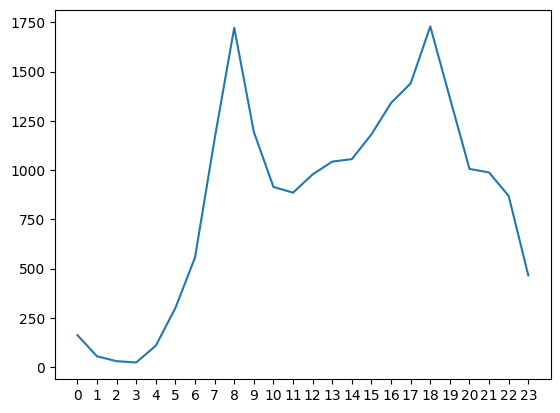

In [ ]:
plt.plot(temp)

## 광진구 버스 미세먼지 데이터

In [ ]:
bus_dust10= pd.read_csv("./bus_dust10.csv")
bus_dust10

,Unnamed: 0,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,행정동
0,0,1,101000252,5118,4760.000000,0.000000,0.00,0.000000,13112.814815,33010.551724,...,96367.896552,90607.655172,99783.448276,93399.827586,70849.344828,50635.551724,51476.000000,24537.034483,11954.80,중곡2동
1,1,1,104000001,5001,11044.137931,7743.333333,1307.25,2169.925926,13645.115385,33338.482759,...,82420.689655,83999.310345,105501.827586,124680.827586,95319.000000,75719.103448,98488.620690,56478.172414,25929.00,중곡1동
2,2,1,104000002,5002,21581.241379,4239.000000,2080.50,891.153846,3113.518519,60585.517241,...,144201.103448,147345.655172,166013.793103,217965.517241,143985.310345,96587.068966,123431.137931,71198.689655,32979.70,군자동
3,3,1,104000003,5003,20706.000000,11400.000000,6993.60,6976.160000,26445.222222,61715.379310,...,137992.862069,157046.000000,177901.586207,219170.172414,142810.448276,109457.689655,151096.000000,93915.241379,39717.60,중곡2동
4,4,1,104000004,5004,33087.517241,6406.285714,5244.00,2565.400000,21328.500000,69406.896552,...,166100.689655,202540.137931,220336.344828,262057.758621,209031.793103,153832.965517,203403.517241,111223.275862,49842.00,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,3251,12,104900127,5671,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,2606.200000,2530.666667,1783.600000,2261.000000,1056.000000,792.000000,873.000000,686.400000,35.00,광장동
3252,3252,12,104900128,5511,0.000000,0.000000,0.00,0.000000,0.000000,679.250000,...,7398.000000,10040.625000,9066.666667,9958.666667,8190.875000,6961.500000,8253.000000,6025.000000,875.75,중곡3동
3253,3253,12,104900129,5999,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,59113.600000,62137.777778,77178.400000,109590.000000,78312.300000,59084.300000,47254.800000,38615.500000,13830.60,구의3동
3254,3254,12,104900132,5994,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,747.400000,606.222222,1335.900000,1722.600000,1368.800000,946.000000,607.600000,213.300000,0.00,중곡2동


In [ ]:
bus_dust10.drop(['Unnamed: 0'], axis=1, inplace = True)
bus_dust10

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,1,101000252,5118,4760.000000,0.000000,0.00,0.000000,13112.814815,33010.551724,58424.896552,...,96367.896552,90607.655172,99783.448276,93399.827586,70849.344828,50635.551724,51476.000000,24537.034483,11954.80,중곡2동
1,1,104000001,5001,11044.137931,7743.333333,1307.25,2169.925926,13645.115385,33338.482759,49339.862069,...,82420.689655,83999.310345,105501.827586,124680.827586,95319.000000,75719.103448,98488.620690,56478.172414,25929.00,중곡1동
2,1,104000002,5002,21581.241379,4239.000000,2080.50,891.153846,3113.518519,60585.517241,62870.620690,...,144201.103448,147345.655172,166013.793103,217965.517241,143985.310345,96587.068966,123431.137931,71198.689655,32979.70,군자동
3,1,104000003,5003,20706.000000,11400.000000,6993.60,6976.160000,26445.222222,61715.379310,56285.689655,...,137992.862069,157046.000000,177901.586207,219170.172414,142810.448276,109457.689655,151096.000000,93915.241379,39717.60,중곡2동
4,1,104000004,5004,33087.517241,6406.285714,5244.00,2565.400000,21328.500000,69406.896552,73216.000000,...,166100.689655,202540.137931,220336.344828,262057.758621,209031.793103,153832.965517,203403.517241,111223.275862,49842.00,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,12,104900127,5671,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,320.400000,...,2606.200000,2530.666667,1783.600000,2261.000000,1056.000000,792.000000,873.000000,686.400000,35.00,광장동
3252,12,104900128,5511,0.000000,0.000000,0.00,0.000000,0.000000,679.250000,793.000000,...,7398.000000,10040.625000,9066.666667,9958.666667,8190.875000,6961.500000,8253.000000,6025.000000,875.75,중곡3동
3253,12,104900129,5999,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,29789.600000,...,59113.600000,62137.777778,77178.400000,109590.000000,78312.300000,59084.300000,47254.800000,38615.500000,13830.60,구의3동
3254,12,104900132,5994,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,154.700000,...,747.400000,606.222222,1335.900000,1722.600000,1368.800000,946.000000,607.600000,213.300000,0.00,중곡2동


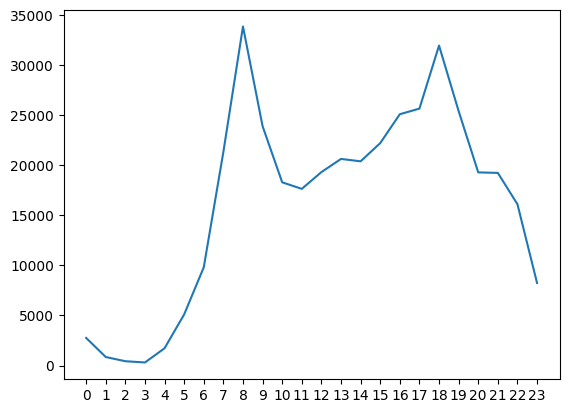

In [ ]:
new4_2 = bus_dust10.copy()
new4_2

new4_2.loc['시간 별 평균 이용자 수',:]= new4_2.loc['0':'3255','0':'23'].mean(axis=0)
new4_2

temp_2 = new4_2.iloc[3256,3:27]

temp_2

plt.plot(temp_2)

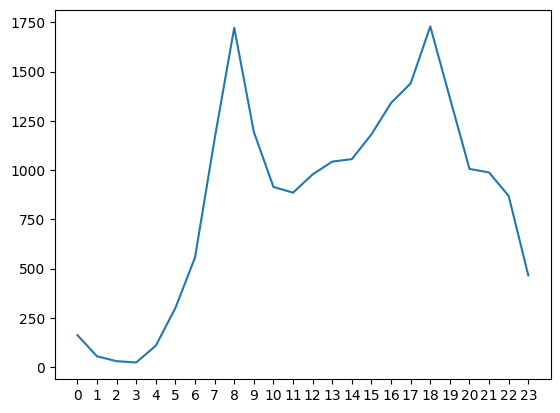

In [ ]:
plt.plot(temp)

In [ ]:
new2_2 = bus_dust10.copy()
new2_2

new2_2.loc[:,'일일 총 이용객 수'] =  new2_2.loc[:,'0':'23'].sum(axis=1)
new2_2

new2_2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2_2

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,일일 총 이용객 수
921,4,104000139,5232,221717.760000,62678.000000,24050.000000,18300.571429,19960.363636,57236.041667,59120.480000,...,319781.590909,363560.217391,428760.000000,441591.428571,418653.000000,376912.826087,427350.000000,327109.600000,화양동,5.398035e+06
114,1,104000139,5232,25768.931034,10422.363636,7386.272727,5695.000000,8825.666667,37009.655172,44571.034483,...,397918.862069,397625.068966,557682.517241,450260.793103,428318.172414,646345.068966,282160.551724,91556.333333,화양동,5.223089e+06
1732,7,104000139,5232,80724.774194,37932.941176,25176.200000,12513.933333,17207.142857,41314.838710,40152.724138,...,358448.000000,457267.166667,580249.310345,480096.896552,367555.354839,386418.741935,362896.724138,239904.677419,화양동,5.219893e+06
652,3,104000139,5232,80630.608696,18564.000000,5382.000000,5782.636364,8217.521739,33352.375000,35520.000000,...,327488.000000,373166.181818,517909.090909,391090.583333,313549.041667,293112.000000,316506.000000,231467.120000,화양동,4.629010e+06
7,1,104000007,5007,26518.896552,3974.857143,1863.000000,1397.000000,23970.230769,93294.827586,144416.000000,...,285778.068966,295572.379310,355549.517241,270131.896552,189842.896552,214350.896552,133869.827586,58548.966667,능동,4.342141e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,12,104000094,5187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,자양1동,0.000000e+00
3061,12,104000095,5188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,자양1동,0.000000e+00
2869,11,104000304,5499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,화양동,0.000000e+00
3063,12,104000097,5190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,자양2동,0.000000e+00


In [ ]:
new2

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,일일 총 이용객 수
3073,202212,104000139,5232,3344,1491,1169,876,822,1971,2216,...,13460,14737,18176,15118,12500,12708,12993,8172,화양동,180450
1083,202205,104000007,5007,1955,651,113,122,1109,4071,5301,...,11197,12012,12806,10116,7506,6718,5659,3262,능동,166353
2804,202211,104000139,5232,2936,1480,756,702,698,1537,1958,...,10747,12722,16717,13672,11399,11243,11621,6833,화양동,161782
1997,202208,104000139,5232,2967,1478,622,588,660,1611,1956,...,10581,12872,16449,13699,10970,11084,11544,7359,화양동,161408
1728,202207,104000139,5232,3132,1697,734,557,730,1642,1647,...,10664,12905,16465,13465,10914,11333,11785,7755,화양동,160330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,202203,104000272,5271,6,2,5,1,0,0,0,...,0,0,0,0,0,0,0,2,중곡3동,16
413,202202,104000272,5271,6,6,2,0,0,0,0,...,0,0,0,0,0,0,0,2,중곡3동,16
415,202202,104000274,5269,7,2,4,1,0,0,0,...,0,0,0,0,0,0,0,1,중곡3동,15
414,202202,104000273,5270,3,3,4,1,0,0,0,...,0,0,0,0,0,0,0,1,중곡3동,12


In [ ]:
new2_2 = new2_2.groupby(['표준버스정류장ID']).agg({'일일 총 이용객 수':'mean'})


In [ ]:
new2_2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2_2

,일일 총 이용객 수
표준버스정류장ID,
104000055,2.809866e+06
104000139,2.560465e+06
104000111,2.273131e+06
104000052,2.261989e+06
104000007,1.985874e+06
...,...
104000275,7.708310e+02
104000272,7.264789e+02
104000274,7.163787e+02


In [ ]:
new2 = new2.groupby(['표준버스정류장ID']).agg({'일일 총 이용객 수':'mean'})


In [ ]:
new2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2

,일일 총 이용객 수
표준버스정류장ID,
104000139,147535.166667
104000007,146950.166667
104000125,115582.500000
104000006,102907.333333
104000004,101130.833333
...,...
104900057,800.166667
104000275,64.500000
104000274,31.666667


In [ ]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,140,0,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,221,0,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900126,5990,광장자이아파트,0,0,0,0,...,16,36,23,50,45,51,17,26,27,7
5679,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,34,53,36,29,31,20,7,12,20,0
5680,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,80,104,120,69,88,40,38,33,19,2
5681,202212,광진04,광진04(중곡아파트~강변역),104900128,5511,중곡아파트.기점,0,0,0,0,...,249,274,357,300,308,253,234,262,200,31


In [ ]:
bus_GJ_GB

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [ ]:
bus_table = bus_GJ.loc[:,['표준버스정류장ID', '역명']]
bus_table = bus_table.drop_duplicates()
bus_table

,표준버스정류장ID,역명
2328,101000252,신성시장앞
4429,104000001,군자교입구
4438,104000002,군자교입구
4447,104000003,군자역.용마초등학교
4455,104000004,군자역.용마초등학교
...,...,...
5197,104900125,중곡119안전센터
5198,104900126,광장자이아파트
5199,104900127,광장자이아파트
5200,104900128,중곡아파트.기점


In [ ]:
bus_table.to_csv('./busdata.csv')

In [ ]:
hello= pd.read_csv("./busdata.csv")
hello

,Unnamed: 0,표준버스정류장ID,역명
0,2328,101000252,신성시장앞
1,4429,104000001,군자교입구
2,4438,104000002,군자교입구
3,4447,104000003,군자역.용마초등학교
4,4455,104000004,군자역.용마초등학교
...,...,...,...
264,5197,104900125,중곡119안전센터
265,5198,104900126,광장자이아파트
266,5199,104900127,광장자이아파트
267,5200,104900128,중곡아파트.기점


In [ ]:
result = pd.merge(bus_GJ_GB, bus_table,how='outer')
result

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,역명
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2493,2920,2617,2103,1503,1514,713,363,중곡2동,신성시장앞
1,202202,101000252,5118,81,0,0,0,380,929,1520,...,2302,2415,2501,1937,1307,1197,729,271,중곡2동,신성시장앞
2,202203,101000252,5118,163,0,0,0,481,1017,1944,...,2594,2782,2823,2232,1504,1164,863,406,중곡2동,신성시장앞
3,202204,101000252,5118,220,0,0,0,459,989,2099,...,2709,2942,2868,2358,1613,1259,891,408,중곡2동,신성시장앞
4,202205,101000252,5118,221,0,0,0,477,1051,2200,...,2877,3103,3261,2327,1859,1351,930,413,중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202208,104900129,5999,0,0,0,0,0,0,1710,...,3057,4067,5479,3945,2880,2198,2003,787,구의3동,강변역.테크노마트앞
3224,202209,104900129,5999,0,0,0,0,0,0,1768,...,3067,4046,5505,3756,2931,2314,2121,721,구의3동,강변역.테크노마트앞
3225,202210,104900129,5999,0,0,0,0,0,0,1673,...,3191,4049,5726,4008,3136,2346,2175,782,구의3동,강변역.테크노마트앞
3226,202211,104900129,5999,0,0,0,0,0,0,1634,...,3112,4182,5907,4092,2875,2363,1981,756,구의3동,강변역.테크노마트앞


In [ ]:
result['표준버스정류장ID'].nunique()

269

In [ ]:
result.to_csv('./bususer_GwangJin.csv')

In [ ]:
bus50= pd.read_csv('./bus_dust_top50.csv')
bus50

,Unnamed: 0.1,Unnamed: 0,정류장_ID,시간합,역명,행정동,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu,index_right,ADM_DR_CD,ADM_DR_NM
0,0,53,104000055,4.543287e+06,광진구청,구의1동,광진구청,일반차로,5148,127.083519,37.538986,POINT (127.083519 37.538986),89185,252-14대,1121510300102520014,72,1105060,구의1동
1,1,114,104000139,4.099491e+06,건대입구역사거리.건대병원,화양동,건대입구역사거리.건대병원,일반차로,5232,127.071264,37.540981,POINT (127.071264 37.540981),101930,4-15도,1121510700100040015,65,1105053,화양동
2,2,89,104000111,4.021563e+06,광진문화예술회관,자양3동,광진문화예술회관,일반차로,5204,127.070169,37.538565,POINT (127.070169 37.538565),137162,227-337 도,1121510500102270337,78,1105066,자양3동
3,3,50,104000052,3.663630e+06,광진경찰서,구의1동,광진경찰서,일반차로,5145,127.083688,37.541534,POINT (127.083688 37.541534),87237,236-11도,1121510300102360011,72,1105060,구의1동
4,4,7,104000007,3.661800e+06,어린이대공원후문아차산역,능동,어린이대공원후문아차산역,중앙차로,5007,127.089245,37.552423,POINT (127.089245 37.552423),106499,256-16 도,1121510200102560016,71,1105059,능동
5,5,6,104000006,3.095187e+06,어린이대공원후문아차산역,구의2동,어린이대공원후문아차산역,중앙차로,5006,127.090149,37.551208,POINT (127.090149 37.551208),84609,96도,1121510300100960000,73,1105061,구의2동
6,6,2,104000002,2.981546e+06,군자교입구,군자동,군자교입구,중앙차로,5002,127.074900,37.558794,POINT (127.0749 37.558794),102394,484도,1121510900104840000,66,1105054,군자동
7,7,3,104000003,2.947707e+06,군자역.용마초등학교,중곡2동,군자역.용마초등학교,중앙차로,5003,127.082473,37.556099,POINT (127.082473 37.556099),81135,272-12도,1121510100102720012,68,1105056,중곡2동
8,8,100,104000125,2.896831e+06,건대로데오거리입구,자양4동,건대로데오거리입구,일반차로,5218,127.069926,37.538919,POINT (127.069926 37.538919),247655,2-65 도,1121510500100020065,79,1105067,자양4동
9,9,69,104000082,2.891974e+06,광진구청,자양1동,광진구청,일반차로,5175,127.083153,37.538488,POINT (127.083153 37.538488),91615,777대,1121510500107770000,76,1105064,자양1동


In [ ]:
busS_GJ.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 338 entries, 5018 to 69222
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   정류장_ID     338 non-null    int32   
 1   정류장_명칭     338 non-null    object  
 2   정류장_유형     338 non-null    object  
 3   정류장_번호     338 non-null    int32   
 4   위도         338 non-null    float64 
 5   경도         338 non-null    float64 
 6   geometry   338 non-null    geometry
 7   sgg_oid    338 non-null    int64   
 8   jibun      338 non-null    object  
 9   pnu        338 non-null    object  
 10  ADM_DR_CD  338 non-null    object  
 11  ADM_DR_NM  338 non-null    object  
dtypes: float64(2), geometry(1), int32(2), int64(1), object(6)
memory usage: 31.7+ KB


In [ ]:
origin_ = map_hjd_GJ.groupby(['ADM_DR_NM']).apply(lambda gr : gr.area.sum())

In [ ]:
map_hjd_GJ

,ADM_DR_CD,ADM_DR_NM,geometry
65,1105053,화양동,"POLYGON ((127.07047 37.54799, 127.07057 37.547..."
66,1105054,군자동,"POLYGON ((127.07924 37.55673, 127.07911 37.556..."
67,1105055,중곡1동,"POLYGON ((127.07950 37.55717, 127.07950 37.557..."
68,1105056,중곡2동,"POLYGON ((127.08574 37.56338, 127.08574 37.563..."
69,1105057,중곡3동,"POLYGON ((127.08062 37.57164, 127.08065 37.571..."
70,1105058,중곡4동,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
71,1105059,능동,"POLYGON ((127.08274 37.55590, 127.08284 37.555..."
72,1105060,구의1동,"POLYGON ((127.09021 37.54283, 127.09014 37.542..."
73,1105061,구의2동,"POLYGON ((127.10492 37.55638, 127.10491 37.556..."
74,1105062,구의3동,"POLYGON ((127.09248 37.54412, 127.09266 37.544..."


In [ ]:
grid_cnt_4326

,geometry,x_index,y_index,sgg_oid,jibun,bchk,pnu,col_adm_se
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,145-4천,1,1121510500101450004,11215
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,145-4천,1,1121510500101450004,11215
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,145-4천,1,1121510500101450004,11215
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,145-4천,1,1121510500101450004,11215
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,145-4천,1,1121510500101450004,11215
...,...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,5-2대,1,1121510400100050002,11215
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,5-2대,1,1121510400100050002,11215
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,1 수,1,1121510400100010000,11215
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,17수,1,1121510400100170000,11215


In [ ]:
polygon = gpd.GeoDataFrame(grid_cnt_4326['geometry'], geometry='geometry')
polygon 

,geometry
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533..."
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531..."
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533..."
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531..."
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533..."
...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560..."
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558..."
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556..."
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555..."


In [ ]:
hjd_list = []
for i in range(polygon.shape[0])  :
    dif_area = gpd.overlay(map_hjd_GJ, polygon.iloc[i:i+1,:], how='intersection')
    dif_area = dif_area.dissolve(by='ADM_DR_NM')
    hjd_list.append(dif_area.area.index[np.argmax(dif_area.area)])

In [ ]:
hjd_list

['자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양3동',
 '자양3동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양4동',
 '자양3동',
 '자양4동',
 '자양4동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '화양동',
 '화양동',
 '화양동',
 '화양동',
 '화양동',
 '자양4동',
 '화양동',
 '화양동',
 '군자동',
 '화양동',
 '화양동',
 '군자동',
 '화양동',
 '화양동',
 '화양동',
 '자양4동',
 '자양3동',
 '자양4동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양2동',
 '자양3동',
 '자양3동',
 '군자동',
 '군자동',
 '군자동',
 '군자동',
 '화양동',
 '화양동',
 '화양동',
 '화양동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양2동',
 '자양3동',
 '자양2동',
 '자양2동',
 '군자동',
 '군자동',
 '군자동',
 '군자동',
 '군자동',
 '군자동',
 '군자동',
 '화양동',
 '능동',
 '화양동',
 '화양동',
 '화양동',
 '화양동',
 '화양동',
 '자양3동',
 '자양3동',
 '자양3동',
 '자양3동',
 '

In [ ]:
grid_cnt_4326['행정동'] = hjd_list
grid_cnt_4326

,geometry,x_index,y_index,sgg_oid,jibun,bchk,pnu,col_adm_se,행정동
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,145-4천,1,1121510500101450004,11215,자양4동
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,145-4천,1,1121510500101450004,11215,자양4동
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,145-4천,1,1121510500101450004,11215,자양4동
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,145-4천,1,1121510500101450004,11215,자양4동
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,145-4천,1,1121510500101450004,11215,자양4동
...,...,...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,5-2대,1,1121510400100050002,11215,광장동
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,5-2대,1,1121510400100050002,11215,광장동
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,1 수,1,1121510400100010000,11215,광장동
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,17수,1,1121510400100170000,11215,광장동


In [ ]:
snC_GJ_map= pd.read_csv("./snC_GJ_map.csv")
snC_GJ_map

,Unnamed: 0,행정동,경로당명,주소,회원수(총원),위도,경도,geometry
0,0,중곡1동,중곡1동 제1,서울특별시 광진구 긴고랑로5길 10,37,37.564229,127.078800,POINT (127.0788004 37.5642294)
1,1,중곡1동,중곡1동 제2,서울특별시 광진구 긴고랑로8길 51,36,37.561565,127.078102,POINT (127.078102 37.561565)
2,2,중곡2동,한마음,서울특별시 광진구 긴고랑로22길 39-4,32,37.560644,127.084258,POINT (127.0842583 37.5606438)
3,3,중곡2동,장수,서울특별시 광진구 긴고랑로31길 44,22,37.561130,127.086937,POINT (127.0869371 37.5611298)
4,4,중곡3동,용마,서울특별시 광진구 용마산로31길 38-8,35,37.569145,127.084828,POINT (127.0848278 37.5691449)
...,...,...,...,...,...,...,...,...
92,92,군자동,군자,서울특별시 광진구 동일로52길 27,55,37.554552,127.072090,POINT (127.0720904 37.5545518)
93,93,군자동,양마,서울특별시 광진구 동일로42길 2,39,37.552675,127.070542,POINT (127.0705417 37.5526747)
94,94,군자동,양마제2,서울특별시 광진구 군자로13길 35,40,37.552432,127.071189,POINT (127.0711893 37.5524317)
95,95,군자동,복조리,서울특별시 광진구 광나루로17길 28,41,37.548796,127.072711,POINT (127.0727108 37.5487957)


In [ ]:
# 데이터를 맵핑하기 위하여 GeoDataFrame 형식으로 변환
snC_GJ_map['경도'] =snC_GJ_map['경도'].astype(float)
snC_GJ_map['위도'] = snC_GJ_map['위도'].astype(float)
snC_GJ_map['geometry'] = snC_GJ_map.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
snC_GJ_map = gpd.GeoDataFrame(snC_GJ_map, geometry='geometry')
snC_GJ_map

,Unnamed: 0,행정동,경로당명,주소,회원수(총원),위도,경도,geometry
0,0,중곡1동,중곡1동 제1,서울특별시 광진구 긴고랑로5길 10,37,37.564229,127.078800,POINT (127.07880 37.56423)
1,1,중곡1동,중곡1동 제2,서울특별시 광진구 긴고랑로8길 51,36,37.561565,127.078102,POINT (127.07810 37.56157)
2,2,중곡2동,한마음,서울특별시 광진구 긴고랑로22길 39-4,32,37.560644,127.084258,POINT (127.08426 37.56064)
3,3,중곡2동,장수,서울특별시 광진구 긴고랑로31길 44,22,37.561130,127.086937,POINT (127.08694 37.56113)
4,4,중곡3동,용마,서울특별시 광진구 용마산로31길 38-8,35,37.569145,127.084828,POINT (127.08483 37.56914)
...,...,...,...,...,...,...,...,...
92,92,군자동,군자,서울특별시 광진구 동일로52길 27,55,37.554552,127.072090,POINT (127.07209 37.55455)
93,93,군자동,양마,서울특별시 광진구 동일로42길 2,39,37.552675,127.070542,POINT (127.07054 37.55267)
94,94,군자동,양마제2,서울특별시 광진구 군자로13길 35,40,37.552432,127.071189,POINT (127.07119 37.55243)
95,95,군자동,복조리,서울특별시 광진구 광나루로17길 28,41,37.548796,127.072711,POINT (127.07271 37.54880)


In [ ]:
snC_GJ_map.crs = {'init':'epsg:4326'}
snC_GJ_map = snC_GJ_map.to_crs({'init':'epsg:4326'})

In [ ]:
snC_GJ_map['위도'].value_counts()

위도
37.538847    11
0.000000     11
37.532928     3
37.529804     3
37.533470     3
             ..
37.532024     1
37.532931     1
37.561565     1
37.531824     1
37.551339     1
Name: count, Length: 65, dtype: int64

In [ ]:
grid_data = gpd.sjoin(grid_cnt_4326, snC_GJ_map, how='left', op="intersects")
grid_data

,geometry,x_index,y_index,sgg_oid,jibun,bchk,pnu,col_adm_se,행정동_left,index_right,Unnamed: 0,행정동_right,경로당명,주소,회원수(총원),위도,경도
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,5-2대,1,1121510400100050002,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,5-2대,1,1121510400100050002,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,1 수,1,1121510400100010000,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,17수,1,1121510400100170000,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grid_data.drop(['index_right','Unnamed: 0','회원수(총원)','위도','경도','bchk','행정동_right','주소','jibun','pnu'], axis=1,inplace=True)
grid_data.rename(columns={'행정동_left':'행정동'}, inplace = True)
grid_data

,geometry,x_index,y_index,sgg_oid,col_adm_se,행정동,경로당명
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,11215,자양4동,NaN
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,11215,자양4동,NaN
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,11215,자양4동,NaN
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,11215,자양4동,NaN
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,11215,자양4동,NaN
...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,11215,광장동,NaN
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,11215,광장동,NaN
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,11215,광장동,NaN
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,11215,광장동,NaN


In [ ]:
grid_data1 = grid_data[['x_index','y_index','경로당명']].groupby(['x_index','y_index'],as_index=False).count()
grid_data1.rename(columns={'경로당명':'격자 당 경로당 수'}, inplace = True)
grid_data1

,x_index,y_index,격자 당 경로당 수
0,0,22,0
1,0,23,0
2,0,24,0
3,0,25,0
4,1,20,0
...,...,...,...
478,25,8,0
479,25,9,0
480,25,10,0
481,25,11,0


In [ ]:
grid_data1['격자 당 경로당 수'].value_counts()

격자 당 경로당 수
0     427
1      42
2       8
3       4
5       1
11      1
Name: count, dtype: int64

In [ ]:
grid_data1['격자 당 경로당 수'].sum()

86

In [ ]:
grid_data2 = grid_data[['geometry','x_index','y_index','행정동']]
grid_data2.drop_duplicates(inplace =True)
grid_data2

,geometry,x_index,y_index,행정동
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,자양4동
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,자양4동
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,자양4동
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,자양4동
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,자양4동
...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,광장동
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,광장동
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,광장동
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,광장동


In [ ]:
grid_data3 = pd.merge(grid_data1, grid_data2)
grid_data3['격자 당 경로당 수'].sum()

86

In [ ]:
grid_data3

,x_index,y_index,격자 당 경로당 수,geometry,행정동
0,0,22,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",자양4동
1,0,23,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",자양4동
2,0,24,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529...",자양4동
3,0,25,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527...",자양4동
4,1,20,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536...",자양4동
...,...,...,...,...,...
478,25,8,0,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",광장동
479,25,9,0,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",광장동
480,25,10,0,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",광장동
481,25,11,0,"POLYGON ((127.11267 37.55328, 127.11493 37.553...",광장동


In [ ]:
grid_data = grid_data3.copy()

In [ ]:
grid_data.to_csv('./grid_data.csv')

In [ ]:
grid_data

,x_index,y_index,격자 당 경로당 수,geometry,행정동
0,0,22,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",자양4동
1,0,23,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",자양4동
2,0,24,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529...",자양4동
3,0,25,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527...",자양4동
4,1,20,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536...",자양4동
...,...,...,...,...,...
478,25,8,0,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",광장동
479,25,9,0,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",광장동
480,25,10,0,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",광장동
481,25,11,0,"POLYGON ((127.11267 37.55328, 127.11493 37.553...",광장동


In [ ]:
cc_GJ= gpd.GeoDataFrame.from_file('./childrencare_GwangJin/childrencare_GwangJin.shp',encoding='euc-kr')
cc_GJ

,X_AXIS,Y_AXIS,name,sgg_oid,jibun,pnu,ADM_DR_CD,ADM_DR_NM,type_name,geometry
0,317947,549738,건대사임당어린이집,100176,17-66대,1121510700100170066,1105053,화양동,어린이집,POINT (127.06923 37.54621)
1,318729,549642,느티나무어린이집,102184,478-3대,1121510700104780003,1105053,화양동,어린이집,POINT (127.07809 37.54542)
2,317889,549581,민주어린이집,100740,33-32대,1121510700100330032,1105053,화양동,어린이집,POINT (127.06859 37.54479)
3,318088,549691,새봄어린이집,247698,127-3대,1121510700101270003,1105053,화양동,어린이집,POINT (127.07083 37.54580)
4,317933,549833,예손어린이집,106207,19-57 대,1121510700100190057,1105053,화양동,어린이집,POINT (127.06906 37.54707)
...,...,...,...,...,...,...,...,...,...,...
242,319998,550333,한마음미술학원,84711,48-8대,1121510300100480008,1105061,구의2동,유치원,POINT (127.09237 37.55175)
243,318491,548420,우성유치원,93576,579대,1121510500105790000,1105066,자양3동,유치원,POINT (127.07553 37.53438)
244,317858,548362,인애유치원,93998,553-339대,1121510500105530339,1105066,자양3동,유치원,POINT (127.06837 37.53381)
245,318147,548604,한일유치원,92482,516대,1121510500105160000,1105066,자양3동,유치원,POINT (127.07162 37.53601)


In [ ]:
grid_cc = gpd.sjoin(grid_cnt_4326, cc_GJ, how='left', op="intersects")
grid_cc

,geometry,x_index,y_index,sgg_oid_left,jibun_left,bchk,pnu_left,col_adm_se,행정동,index_right,X_AXIS,Y_AXIS,name,sgg_oid_right,jibun_right,pnu_right,ADM_DR_CD,ADM_DR_NM,type_name
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,99584,145-4천,1,1121510500101450004,11215,자양4동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,89972,5-2대,1,1121510400100050002,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,89972,5-2대,1,1121510400100050002,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,106075,1 수,1,1121510400100010000,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,90063,17수,1,1121510400100170000,11215,광장동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grid_cc1 = grid_cc[['x_index','y_index','type_name']].groupby(['x_index','y_index'],as_index=False).count()
grid_cc1.rename(columns={'type_name':'격자 당 어린이 보육시설 수'}, inplace = True)
grid_cc1

,x_index,y_index,격자 당 어린이 보육시설 수
0,0,22,0
1,0,23,0
2,0,24,0
3,0,25,0
4,1,20,0
...,...,...,...
478,25,8,0
479,25,9,0
480,25,10,0
481,25,11,0


In [ ]:
grid_cc2 = grid_cc[['geometry','x_index','y_index','행정동']]
grid_cc2.drop_duplicates(inplace =True)
grid_cc2

,geometry,x_index,y_index,행정동
22,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",0,22,자양4동
23,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",0,23,자양4동
51,"POLYGON ((127.05844 37.53326, 127.06071 37.533...",1,22,자양4동
52,"POLYGON ((127.05845 37.53146, 127.06072 37.531...",1,23,자양4동
80,"POLYGON ((127.06071 37.53327, 127.06297 37.533...",2,22,자양4동
...,...,...,...,...
732,"POLYGON ((127.11263 37.56049, 127.11490 37.560...",25,7,광장동
733,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",25,8,광장동
734,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",25,9,광장동
735,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",25,10,광장동


In [ ]:
grid_cc3 = pd.merge(grid_cc1, grid_cc2)

In [ ]:
grid_cc = grid_cc3.copy()
grid_cc

,x_index,y_index,격자 당 어린이 보육시설 수,geometry,행정동
0,0,22,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",자양4동
1,0,23,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",자양4동
2,0,24,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529...",자양4동
3,0,25,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527...",자양4동
4,1,20,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536...",자양4동
...,...,...,...,...,...
478,25,8,0,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",광장동
479,25,9,0,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",광장동
480,25,10,0,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",광장동
481,25,11,0,"POLYGON ((127.11267 37.55328, 127.11493 37.553...",광장동


In [ ]:
grid_data = pd.merge(grid_data, grid_cc)
grid_data

,x_index,y_index,격자 당 경로당 수,geometry,행정동,격자 당 어린이 보육시설 수
0,0,22,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",자양4동,0
1,0,23,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",자양4동,0
2,0,24,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529...",자양4동,0
3,0,25,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527...",자양4동,0
4,1,20,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536...",자양4동,0
...,...,...,...,...,...,...
478,25,8,0,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",광장동,0
479,25,9,0,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",광장동,0
480,25,10,0,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",광장동,0
481,25,11,0,"POLYGON ((127.11267 37.55328, 127.11493 37.553...",광장동,0


In [ ]:
grid_data

,x_index,y_index,격자 당 경로당 수,geometry,행정동,격자 당 어린이 보육시설 수
0,0,22,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",자양4동,0
1,0,23,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",자양4동,0
2,0,24,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529...",자양4동,0
3,0,25,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527...",자양4동,0
4,1,20,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536...",자양4동,0
...,...,...,...,...,...,...
478,25,8,0,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",광장동,0
479,25,9,0,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",광장동,0
480,25,10,0,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",광장동,0
481,25,11,0,"POLYGON ((127.11267 37.55328, 127.11493 37.553...",광장동,0


In [ ]:
grid_data = gpd.GeoDataFrame(grid_data, geometry='geometry')
grid_data

,x_index,y_index,격자 당 경로당 수,geometry,행정동,격자 당 어린이 보육시설 수
0,0,22,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",자양4동,0
1,0,23,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",자양4동,0
2,0,24,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529...",자양4동,0
3,0,25,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527...",자양4동,0
4,1,20,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536...",자양4동,0
...,...,...,...,...,...,...
478,25,8,0,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",광장동,0
479,25,9,0,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",광장동,0
480,25,10,0,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",광장동,0
481,25,11,0,"POLYGON ((127.11267 37.55328, 127.11493 37.553...",광장동,0


In [ ]:
grid_data.set_crs(epsg=4326, inplace=True)
grid_data = grid_data.to_crs({'init':'epsg:5179'})
grid_data

,x_index,y_index,격자 당 경로당 수,geometry,행정동,격자 당 어린이 보육시설 수
0,0,22,0,"POLYGON ((960788.000 1948308.000, 960988.000 1...",자양4동,0
1,0,23,0,"POLYGON ((960788.000 1948108.000, 960988.000 1...",자양4동,0
2,0,24,0,"POLYGON ((960788.000 1947908.000, 960988.000 1...",자양4동,0
3,0,25,0,"POLYGON ((960788.000 1947708.000, 960988.000 1...",자양4동,0
4,1,20,0,"POLYGON ((960988.000 1948708.000, 961188.000 1...",자양4동,0
...,...,...,...,...,...,...
478,25,8,0,"POLYGON ((965788.000 1951108.000, 965988.000 1...",광장동,0
479,25,9,0,"POLYGON ((965788.000 1950908.000, 965988.000 1...",광장동,0
480,25,10,0,"POLYGON ((965788.000 1950708.000, 965988.000 1...",광장동,0
481,25,11,0,"POLYGON ((965788.000 1950508.000, 965988.000 1...",광장동,0


In [ ]:
grid_data['중심점']=grid_data.geometry.centroid
grid_data['x'] = grid_data.geometry.centroid.x
grid_data['y'] = grid_data.geometry.centroid.y
grid_data

,x_index,y_index,격자 당 경로당 수,geometry,행정동,격자 당 어린이 보육시설 수,중심점,x,y
0,0,22,0,"POLYGON ((960788.000 1948308.000, 960988.000 1...",자양4동,0,POINT (960888.000 1948208.000),960888.0,1948208.0
1,0,23,0,"POLYGON ((960788.000 1948108.000, 960988.000 1...",자양4동,0,POINT (960888.000 1948008.000),960888.0,1948008.0
2,0,24,0,"POLYGON ((960788.000 1947908.000, 960988.000 1...",자양4동,0,POINT (960888.000 1947808.000),960888.0,1947808.0
3,0,25,0,"POLYGON ((960788.000 1947708.000, 960988.000 1...",자양4동,0,POINT (960888.000 1947608.000),960888.0,1947608.0
4,1,20,0,"POLYGON ((960988.000 1948708.000, 961188.000 1...",자양4동,0,POINT (961088.000 1948608.000),961088.0,1948608.0
...,...,...,...,...,...,...,...,...,...
478,25,8,0,"POLYGON ((965788.000 1951108.000, 965988.000 1...",광장동,0,POINT (965888.000 1951008.000),965888.0,1951008.0
479,25,9,0,"POLYGON ((965788.000 1950908.000, 965988.000 1...",광장동,0,POINT (965888.000 1950808.000),965888.0,1950808.0
480,25,10,0,"POLYGON ((965788.000 1950708.000, 965988.000 1...",광장동,0,POINT (965888.000 1950608.000),965888.0,1950608.0
481,25,11,0,"POLYGON ((965788.000 1950508.000, 965988.000 1...",광장동,0,POINT (965888.000 1950408.000),965888.0,1950408.0


In [ ]:
grid_data.to_csv('./grid_data2.csv')

In [ ]:
qwer= pd.read_csv('./clustered_grid.csv')
qwer

,Unnamed: 0,x_index,y_index,격자 당 경로당 수,geometry,행정동,격자 당 어린이 보육시설 수,유아비율(%),노인비율(%),kmeans_label
0,0,0,22,0,"POLYGON ((127.0561797939232 37.53325271346528,...",자양4동,0,2.839451,20.913757,0
1,1,0,23,0,POLYGON ((127.05619047599266 37.53145004424569...,자양4동,0,2.839451,20.913757,0
2,2,0,24,0,POLYGON ((127.05620115711046 37.52964737447184...,자양4동,0,2.839451,20.913757,0
3,3,0,25,0,POLYGON ((127.05621183727676 37.52784470414376...,자양4동,0,2.839451,20.913757,0
4,4,1,20,0,POLYGON ((127.05842217001221 37.53686653680621...,자양4동,0,2.839451,20.913757,0
...,...,...,...,...,...,...,...,...,...,...
478,478,25,8,0,POLYGON ((127.11264035105809 37.55868932524784...,광장동,0,5.025170,11.665886,3
479,479,25,9,0,POLYGON ((127.11264968278773 37.55688665089398...,광장동,0,5.025170,11.665886,3
480,480,25,10,0,POLYGON ((127.11265901368601 37.55508397598633...,광장동,0,5.025170,11.665886,3
481,481,25,11,0,POLYGON ((127.11266834375294 37.55328130052497...,광장동,0,5.025170,11.665886,3


In [ ]:
qwer.drop(['Unnamed: 0', 'geometry'], axis=1,inplace=True)
qwer

,x_index,y_index,격자 당 경로당 수,행정동,격자 당 어린이 보육시설 수,유아비율(%),노인비율(%),kmeans_label
0,0,22,0,자양4동,0,2.839451,20.913757,0
1,0,23,0,자양4동,0,2.839451,20.913757,0
2,0,24,0,자양4동,0,2.839451,20.913757,0
3,0,25,0,자양4동,0,2.839451,20.913757,0
4,1,20,0,자양4동,0,2.839451,20.913757,0
...,...,...,...,...,...,...,...,...
478,25,8,0,광장동,0,5.025170,11.665886,3
479,25,9,0,광장동,0,5.025170,11.665886,3
480,25,10,0,광장동,0,5.025170,11.665886,3
481,25,11,0,광장동,0,5.025170,11.665886,3


In [ ]:
qwer = pd.merge(qwer, grid_cnt_4326)
qwer

,x_index,y_index,격자 당 경로당 수,행정동,격자 당 어린이 보육시설 수,유아비율(%),노인비율(%),kmeans_label,geometry,sgg_oid,jibun,bchk,pnu,col_adm_se
0,0,22,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533...",99584,145-4천,1,1121510500101450004,11215
1,0,23,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531...",99584,145-4천,1,1121510500101450004,11215
2,0,24,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529...",137478,823 천,1,1121510500108230000,11215
3,0,25,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527...",137478,823 천,1,1121510500108230000,11215
4,1,20,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536...",98921,210-59도,1,1121510500102100059,11215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,25,8,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11264 37.55869, 127.11490 37.558...",89972,5-2대,1,1121510400100050002,11215
479,25,9,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11265 37.55689, 127.11491 37.556...",106075,1 수,1,1121510400100010000,11215
480,25,10,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11266 37.55508, 127.11492 37.555...",90063,17수,1,1121510400100170000,11215
481,25,11,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11267 37.55328, 127.11493 37.553...",90242,556천,1,1121510400105560000,11215


In [ ]:
qwer.drop(['sgg_oid', 'jibun', 'bchk', 'pnu', 'col_adm_se'], axis=1,inplace=True)
qwer

,x_index,y_index,격자 당 경로당 수,행정동,격자 당 어린이 보육시설 수,유아비율(%),노인비율(%),kmeans_label,geometry
0,0,22,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05618 37.53325, 127.05844 37.533..."
1,0,23,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05619 37.53145, 127.05845 37.531..."
2,0,24,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05620 37.52965, 127.05846 37.529..."
3,0,25,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05621 37.52784, 127.05848 37.527..."
4,1,20,0,자양4동,0,2.839451,20.913757,0,"POLYGON ((127.05842 37.53687, 127.06069 37.536..."
...,...,...,...,...,...,...,...,...,...
478,25,8,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11264 37.55869, 127.11490 37.558..."
479,25,9,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11265 37.55689, 127.11491 37.556..."
480,25,10,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11266 37.55508, 127.11492 37.555..."
481,25,11,0,광장동,0,5.025170,11.665886,3,"POLYGON ((127.11267 37.55328, 127.11493 37.553..."


In [ ]:
qwer = gpd.GeoDataFrame(qwer, geometry='geometry')

In [ ]:
print(grid_cnt_4326.crs)

EPSG:4326


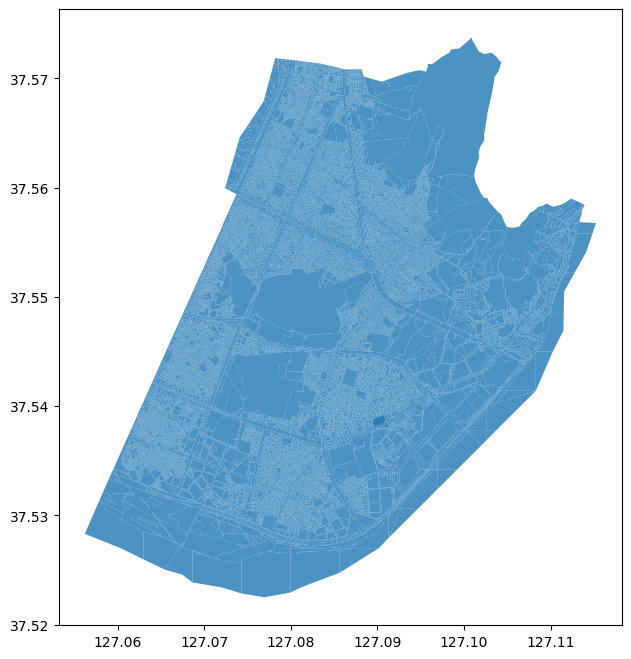

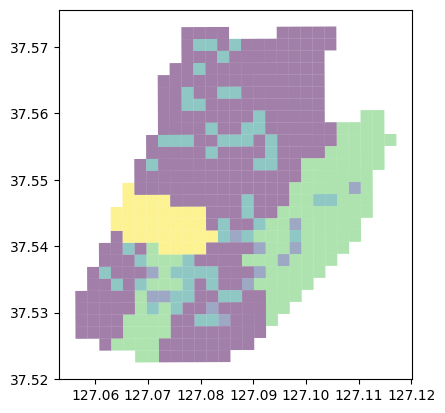

In [ ]:
map_GJ.plot(figsize=(8,8), alpha=0.8)
qwer.plot(column = 'kmeans_label',marker='v', alpha=0.5)
plt.show()